In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score,classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import RandomUnderSampler

from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points

import pickle

import json

import os

In [2]:
%load_ext kedro.ipython

[07/09/24 18:05:34] INFO     Registered line magic '%reload_kedro'                                   ]8;id=811356;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=398859;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=423333;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=947018;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=137151;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=976206;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             c:\Users\carga\Documents\KedroTutorial\montrealfirepredicition.                       
                             To set a different path, run '%reload_kedro <project_root>'                           

[07/09/24 18:05:36] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ked                
                             ro_viz\integrations\kedro\hooks.py:13: KedroDeprecationWarning:                       
                             'TRANSCODING_SEPARATOR' has been moved to                                             
                             'kedro.pipeline.transcoding', and the alias will be removed in Kedro                  
                             0.20.0                                                                                
                               from kedro.pipeline.pipeline import TRANSCODING_SEPARATOR,                          
                             _strip_transcoding                                                                    
                                                                                                                   

[07/09/24 18:05:37] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\laz                
                             y_loader\__init__.py:83: KedroDeprecationWarning: 'GeoJSONDataSet' has                
                             been renamed to 'GeoJSONDataset', and the alias will be removed in                    
                             Kedro-Datasets 2.0.0                                                                  
                               attr = getattr(submod, name)                                                        
                                                                                                                   

                    INFO     Kedro project montrealfirepredicition                                  ]8;id=315607;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=856284;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=784334;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=846570;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[07/09/24 18:05:38] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ked                
                             ro_viz\models\flowchart.py:13: KedroDeprecationWarning:                               
                             'TRANSCODING_SEPARATOR' has been moved to                                             
                             'kedro.pipeline.transcoding', and the alias will be removed in Kedro                  
                             0.20.0                                                                                
                               from kedro.pipeline.pipeline import TRANSCODING_SEPARATOR,                          
                             _strip_transcoding                                                                    
                                                                                                                   

                    WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ked                
                             ro_viz\data_access\repositories\catalog.py:8: KedroDeprecationWarning:                
                             'TRANSCODING_SEPARATOR' has been moved to                                             
                             'kedro.pipeline.transcoding', and the alias will be removed in Kedro                  
                             0.20.0                                                                                
                               from kedro.pipeline.pipeline import TRANSCODING_SEPARATOR,                          
                             _strip_transcoding                                                                    
                                                                                                                   

[07/09/24 18:05:39] INFO     Registered line magic 'run_viz'                                        ]8;id=428456;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=608324;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#148\148]8;;\

In [3]:
table = catalog.load('input_table')

                    INFO     Loading data from input_table (CSVDataset)...                      ]8;id=388634;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=845459;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py#508\508]8;;\

[07/09/24 18:05:57] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ked                
                             ro_datasets\pandas\csv_dataset.py:163: DtypeWarning: Columns                          
                             (1,2,5,6,11,21,22,25) have mixed types. Specify dtype option on import                
                             or set low_memory=False.                                                              
                               return pd.read_csv(load_path, **self._load_args)                                    
                                                                                                                   

In [4]:
def get_mode(series):
    mode = series.mode()
    if not mode.empty:
        return mode.iloc[0]
    else:
        return None  # or a default value like 'unknown'

In [5]:
# Aggregate the data
aggregated_data = pd.DataFrame()
aggregated_data = table.groupby(['index_mesh', 'grid_lat', 'grid_long']).agg({
    'is_fire': 'max',
    'HOUSING_UNITS': 'mean',
    'building_age': 'mean',
    'day_of_week': get_mode,
    'month': get_mode,
    'time_of_day': get_mode,
    'USE_CATEGORY': get_mode,
    '2021_POPULATION': 'mean',
    'POPULATION_DENSITY': 'mean',
    'INCIDENT_ID': 'count',
    'YEAR_CONSTRUCTION': 'mean',
    'ABOVE_GROUND_FLOORS':'max',
    'AVERAGE_FAMILY_SIZE':'mean',
    'distance_to_fire_station': 'mean',

}).reset_index()

# Handling categorical and numerical features
categorical_features = ['time_of_day', 'day_of_week', 'month', 'index_mesh', 'USE_CATEGORY']
numerical_features = ['grid_lat', 'grid_long', 'HOUSING_UNITS', 'building_age', '2021_POPULATION', 'INCIDENT_ID', 'YEAR_CONSTRUCTION', 'POPULATION_DENSITY', 'ABOVE_GROUND_FLOORS', 'AVERAGE_FAMILY_SIZE', 'distance_to_fire_station']

# Fill missing values for count of incidents
aggregated_data['INCIDENT_ID'].fillna(0, inplace=True)

# Fill missing values for use categories of a building
aggregated_data['USE_CATEGORY'].fillna(aggregated_data['USE_CATEGORY'].mode()[0], inplace=True)

# Fill missing values
for col in categorical_features:
    aggregated_data[col].fillna('missing', inplace=True)
for col in numerical_features:
    aggregated_data[col].fillna(aggregated_data[col].mean(), inplace=True)

# Ensure correct data types
for col in categorical_features:
    aggregated_data[col] = aggregated_data[col].astype(str)

# Drop rows with missing target
aggregated_data.dropna(subset=['is_fire'], inplace=True)

# Convert 'is_fire' to binary
aggregated_data['is_fire'] = (aggregated_data['is_fire'] > 0).astype(int)

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with SMOTEENN, preprocessing, and XGBoost model
pipeline_xgb = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('resample', SMOTEENN(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Prepare the data
features = categorical_features + numerical_features
X = aggregated_data[features]
y = aggregated_data['is_fire']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for XGBoost
param_grid = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [3],
    'classifier__learning_rate': [0.1],
    'classifier__subsample': [0.8],
    'classifier__colsample_bytree': [0.6],
    'classifier__gamma': [0.4],
    'classifier__min_child_weight': [7],
    'classifier__reg_alpha': [0],
    'classifier__reg_lambda': [3]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline_xgb, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='roc_auc', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[07/09/24 18:06:56] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgb                
                             oost\core.py:158: UserWarning: [18:06:56] WARNING:                                    
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06                
                             abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['grid_lat',
                                                                          'grid_long',
                                                                          'HOUSING_UNITS',
                                                                          'building_age',
                                                                          '2021_POPULATION',
                                                                          'INCIDENT_ID',
                                                                          'YEAR_CONSTRUCTION',
                                                                          'POPULATION_DENSITY',
                                                                          'ABOVE_GROUND_FLOORS',
                                                                          'AVERAGE_FAMILY_SIZE',
                                                                          'dist...
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.6],
                         'classifier__gamma': [0.4],
                         'classifier__learning_rate': [0.1],
                         'classifier__max_depth': [3],
                         'classifier__min_child_weight': [7],
                         'classifier__n_estimators': [100],
                         'classifier__reg_alpha': [0],
                         'classifier__reg_lambda': [3],
                         'classifier__subsample': [0.8]},
             scoring='roc_auc', verbose=2)

In [6]:
# Print the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best ROC AUC Score: {best_score}")

# Use the best estimator to predict on the test set
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
y_prob_best_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Print out evaluation metrics for the best model
classification_report_str = classification_report(y_test, y_pred_best_xgb)
test_roc_auc_score = roc_auc_score(y_test, y_prob_best_xgb)
print(classification_report_str)
print("Best ROC AUC Score on Test Set:", test_roc_auc_score)

# Cross-validation for the best XGBoost model
cv_scores_xgb = cross_val_score(best_xgb, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
cv_mean_score = cv_scores_xgb.mean()
print(f"Cross-validated ROC AUC Score for XGBoost: {cv_mean_score}")

Best parameters: {'classifier__colsample_bytree': 0.6, 'classifier__gamma': 0.4, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_child_weight': 7, 'classifier__n_estimators': 100, 'classifier__reg_alpha': 0, 'classifier__reg_lambda': 3, 'classifier__subsample': 0.8}
Best ROC AUC Score: 0.9708188659924262
              precision    recall  f1-score   support

           0       0.58      0.95      0.72       186
           1       0.99      0.87      0.92       954

    accuracy                           0.88      1140
   macro avg       0.79      0.91      0.82      1140
weighted avg       0.92      0.88      0.89      1140

Best ROC AUC Score on Test Set: 0.9747469624219471
Cross-validated ROC AUC Score for XGBoost: 0.957702537643554


In [7]:
file_path = 'C://Users//carga//Documents//KedroTutorial//montrealfirepredicition//data//07_model_output'

In [8]:
# Save model using pickle
path_model = os.path.join(file_path,'trained_spatial_xgb_model.pkl')

with open(path_model, 'wb') as model_file:
    pickle.dump(best_xgb, model_file)

In [9]:
# Save the best parameters, scores, and evaluation metrics
results = {
    'best_params': best_params,
    'best_score': best_score,
    'classification_report': classification_report_str,
    'test_roc_auc_score': test_roc_auc_score,
    'cv_mean_score': cv_mean_score
}

# Save results to a JSON file
path_reults = os.path.join(file_path,'trained_spatial_xgb_results.json')
with open(path_reults, 'w') as results_file:
    json.dump(results, results_file, indent=4)

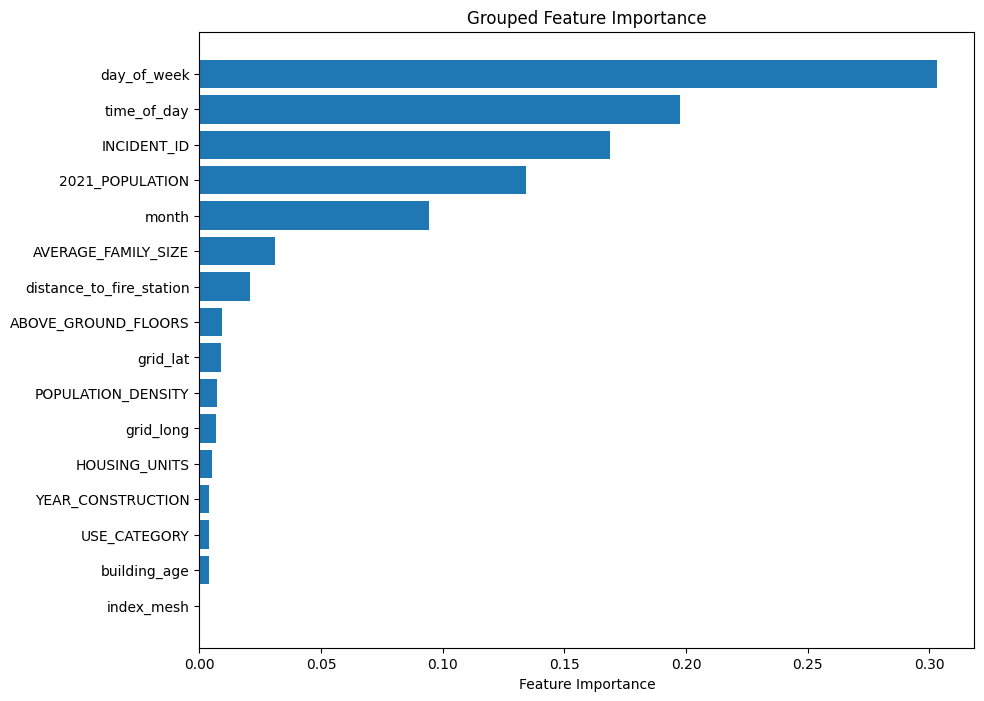

In [10]:
# Extract feature importance from the Random Forest model
feature_importances = best_xgb.named_steps['classifier'].feature_importances_

# Get the feature names from the preprocessing pipeline
categorical_transformer = best_xgb.named_steps['preprocessor'].named_transformers_['cat']
onehot_feature_names = categorical_transformer.named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numerical and categorical feature names
feature_names = numerical_features + list(onehot_feature_names)

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Aggregate importance for categorical features
cat_feature_importance = {}
for col in categorical_features:
    cat_cols = [col_name for col_name in feature_names if col in col_name]
    total_importance = feature_importance_df[feature_importance_df['feature'].isin(cat_cols)]['importance'].sum()
    cat_feature_importance[col] = total_importance

# Create a DataFrame for grouped feature importances
grouped_feature_importance = pd.DataFrame({
    'feature': list(cat_feature_importance.keys()) + numerical_features,
    'importance': list(cat_feature_importance.values()) + [feature_importance_df[feature_importance_df['feature'] == col]['importance'].values[0] for col in numerical_features]
}).sort_values(by='importance', ascending=False)

# Plot grouped feature importances
plt.figure(figsize=(10, 8))
plt.barh(grouped_feature_importance['feature'], grouped_feature_importance['importance'])
plt.xlabel('Feature Importance')
plt.title('Grouped Feature Importance')
plt.gca().invert_yaxis()
plt.show()

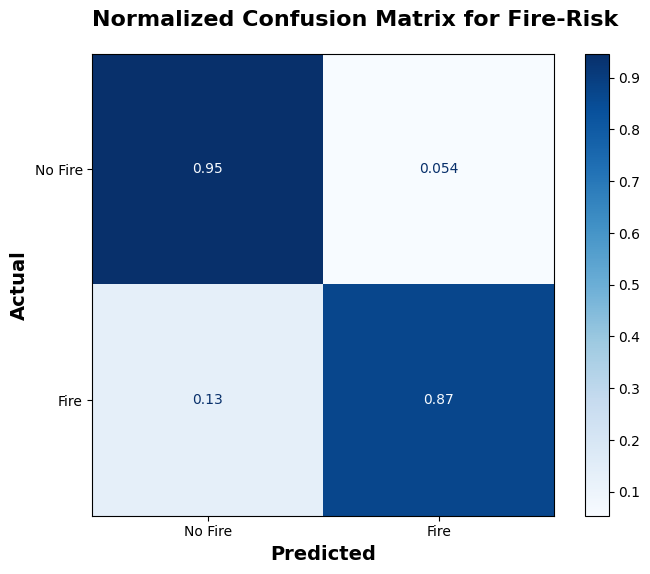

In [11]:
# Confusion Matrix
target_names = ['No Fire', 'Fire']
cm = confusion_matrix(y_test, y_pred_best_xgb, normalize='true')

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Add title and axis labels
title_font = {'size': 16, 'weight': 'bold', 'ha': 'left'}
ax.set_title("Normalized Confusion Matrix for Fire-Risk",
             fontdict=title_font, loc='left', pad=20)
plt.ylabel('Actual', fontsize=14, fontweight="bold")
plt.xlabel('Predicted', fontsize=14, fontweight="bold")
plt.show()